In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('C:\\Users\\hp\\Downloads\\project\\new\\covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
df.shape

(25959, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25959 entries, 0 to 25958
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              25959 non-null  int64  
 1   ObservationDate  25959 non-null  object 
 2   Province/State   12490 non-null  object 
 3   Country/Region   25959 non-null  object 
 4   Last Update      25959 non-null  object 
 5   Confirmed        25959 non-null  float64
 6   Deaths           25959 non-null  float64
 7   Recovered        25959 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [6]:
from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
#df_update=df.loc[df.ObservationDate<pd.Timestamp(date(2020,4,30))]
df_update

SNo ObservationDate Province/State  Country/Region  \
25582  25583      2020-05-17            NaN     Afghanistan   
25583  25584      2020-05-17            NaN         Albania   
25584  25585      2020-05-17            NaN         Algeria   
25585  25586      2020-05-17            NaN         Andorra   
25586  25587      2020-05-17            NaN          Angola   
...      ...             ...            ...             ...   
25954  25955      2020-05-17        Wyoming              US   
25955  25956      2020-05-17       Xinjiang  Mainland China   
25956  25957      2020-05-17          Yukon          Canada   
25957  25958      2020-05-17         Yunnan  Mainland China   
25958  25959      2020-05-17       Zhejiang  Mainland China   

              Last Update  Confirmed  Deaths  Recovered  
25582 2020-05-18 02:32:21       6664     169        778  
25583 2020-05-18 02:32:21        946      31        715  
25584 2020-05-18 02:32:21       7019     548       3507  
25585 2020-05-18 02:32:21        761      51        617  
25586 2020-05-18 02:32:21         48       2         17  
...                   ...        ...     ...        ...  
25954 2020-05-18 02:32:21        754       8          0  
25955 2020-05-18 02:32:21         76       3         73  
25956 2020-05-18 02:32:21         11       0         11  
25957 2020-05-18 02:32:21        185       2        183  
25958 2020-05-18 02:32:21       1268       1       1267  

[377 rows x 8 columns]

In [7]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     181
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [8]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [9]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

SNo ObservationDate Province/State Country/Region  \
25582  25583      2020-05-17    Afghanistan    Afghanistan   
25583  25584      2020-05-17        Albania        Albania   
25584  25585      2020-05-17        Algeria        Algeria   
25585  25586      2020-05-17        Andorra        Andorra   
25586  25587      2020-05-17         Angola         Angola   

              Last Update  Confirmed  Deaths  Recovered  ProvinceID  CountryID  
25582 2020-05-18 02:32:21       6664     169        778           1          0  
25583 2020-05-18 02:32:21        946      31        715           4          1  
25584 2020-05-18 02:32:21       7019     548       3507           6          2  
25585 2020-05-18 02:32:21        761      51        617           8          3  
25586 2020-05-18 02:32:21         48       2         17           9          4

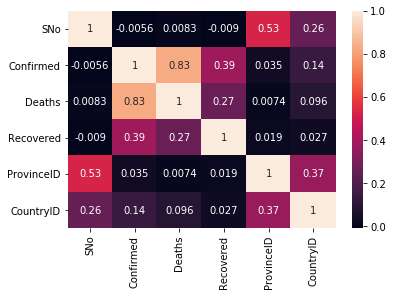

In [11]:
corr= df_update.corr()
sns.heatmap(corr,annot=True)

In [12]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

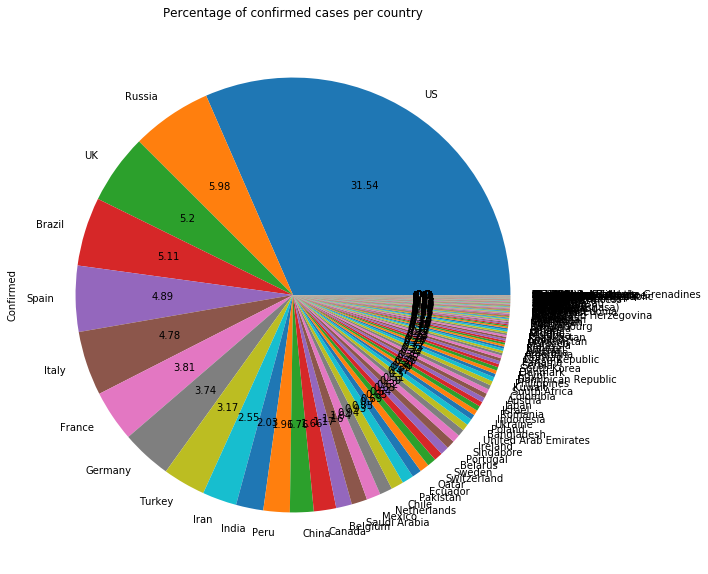

In [13]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

In [14]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

Country/Region  Confirmed  Recovered  Deaths
0             US    1486757     272265   89562
1         Russia     281752      67373    2631
2             UK     244995       1058   34716
3         Brazil     241080      94122   16118
4          Spain     230698     146446   27563

In [15]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

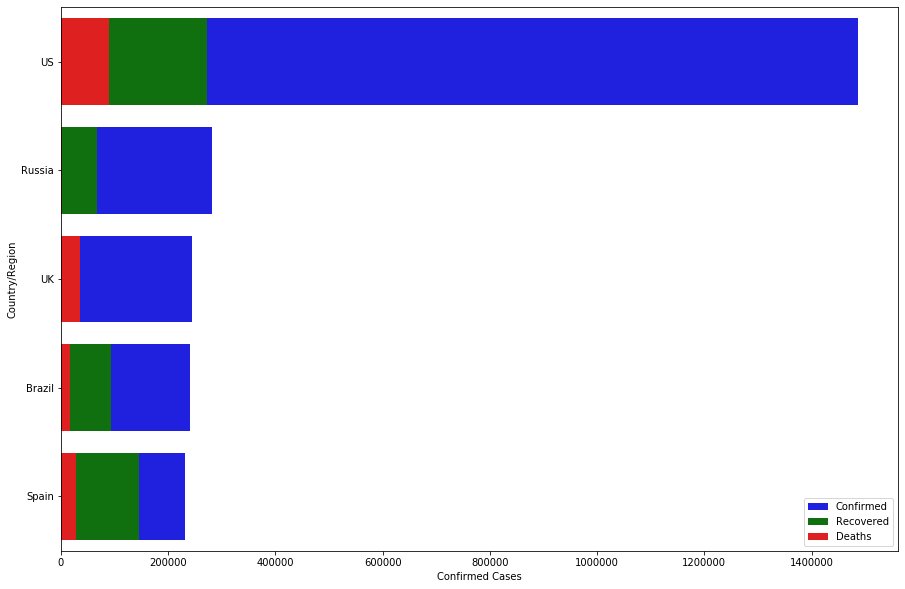

In [16]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

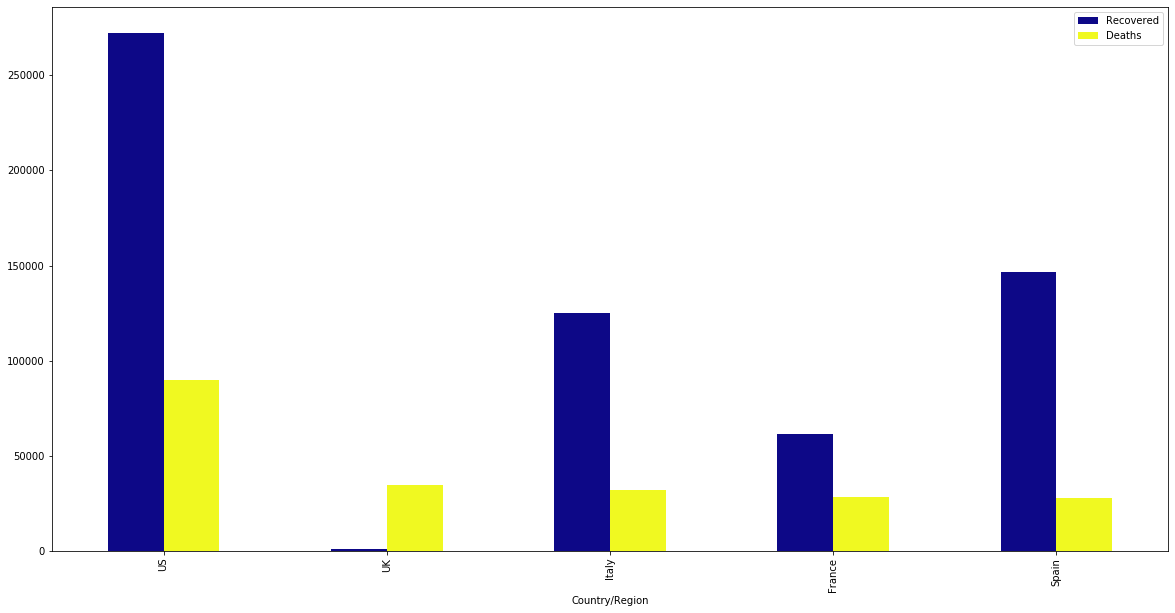

In [17]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

In [18]:
china_cases=df_update.loc[df_update['Country/Region']=='China']

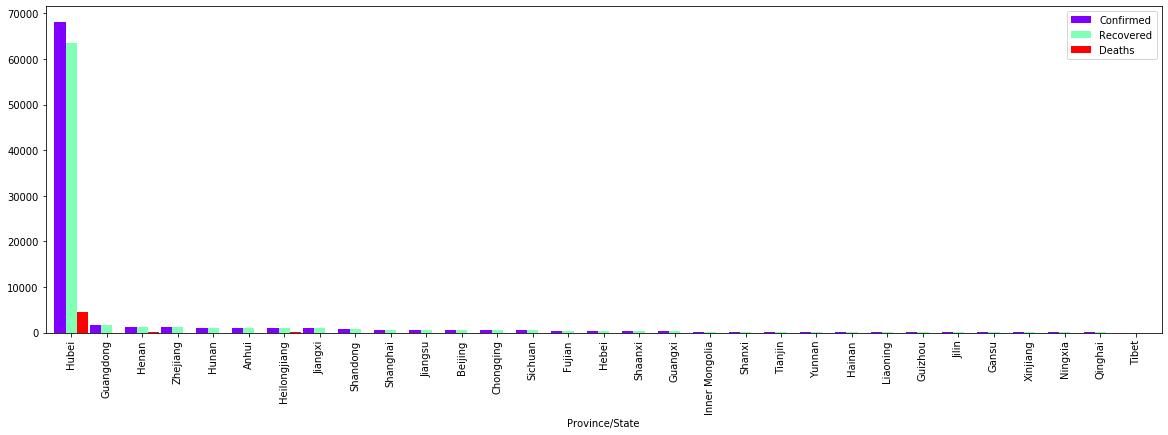

In [19]:
china_province_cases=china_cases[['Confirmed','Recovered','Deaths','Province/State']].groupby('Province/State').sum().sort_values('Confirmed',ascending=False)
china_province_cases.plot(kind='bar',width=0.95,colormap='rainbow',figsize=(20,6))
plt.show()

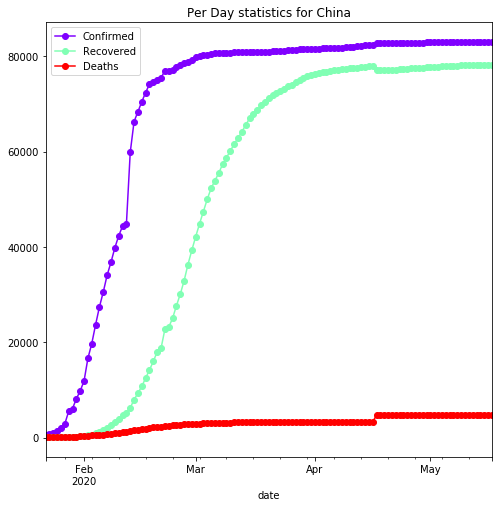

In [20]:
china_cases_complete=df.loc[df['Country/Region']=='China']
china_cases_complete['date'] = china_cases_complete['ObservationDate'].dt.date
china_cases_complete['date']=pd.to_datetime(china_cases_complete['date'])
china_cases_complete = china_cases_complete[china_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = china_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for China',colormap='rainbow',marker='o')
plt.show()

In [21]:
num_plot_china=num_plot.reset_index()
num_plot_china['Death Case Increase']=0
num_plot_china['Confirmed Case Increase']=0
num_plot_china['Confirmed Case Increase'][0]=0
num_plot_china['Death Case Increase'][0]=0
for i in range(1,num_plot_china.shape[0]):
    num_plot_china['Confirmed Case Increase'][i]=-(num_plot_china.iloc[i-1][1]-num_plot_china.iloc[i][1])
    num_plot_china['Death Case Increase'][i]=-(num_plot_china.iloc[i-1][3]-num_plot_china.iloc[i][3])
num_plot_china.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
112 2020-05-13      82929      78195    4633                    0   
113 2020-05-14      82933      78209    4633                    0   
114 2020-05-15      82941      78219    4633                    0   
115 2020-05-16      82947      78227    4634                    1   
116 2020-05-17      82954      78238    4634                    0   

     Confirmed Case Increase  
112                        3  
113                        4  
114                        8  
115                        6  
116                        7

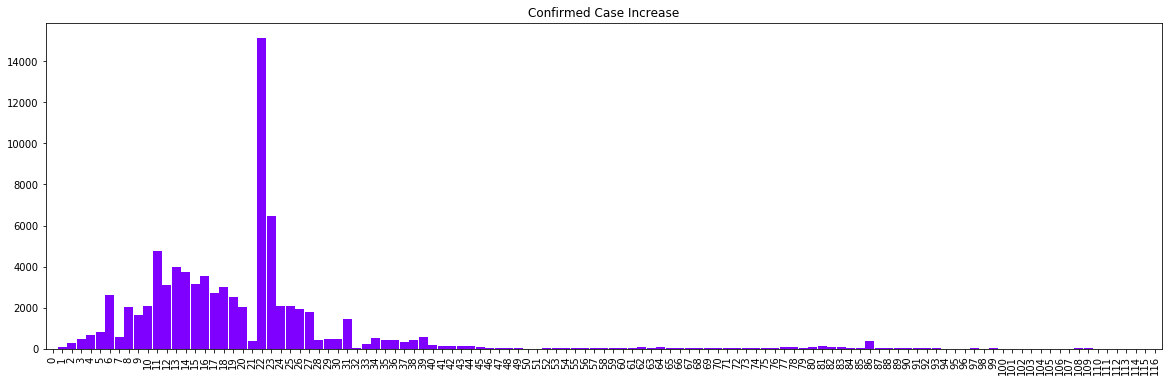

In [22]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='rainbow')
plt.show()

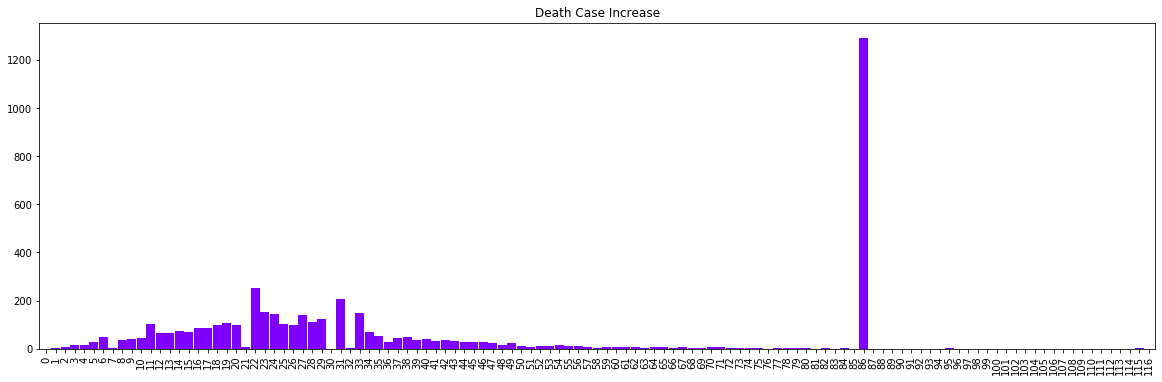

In [23]:
num_plot_china['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='rainbow')
plt.show()

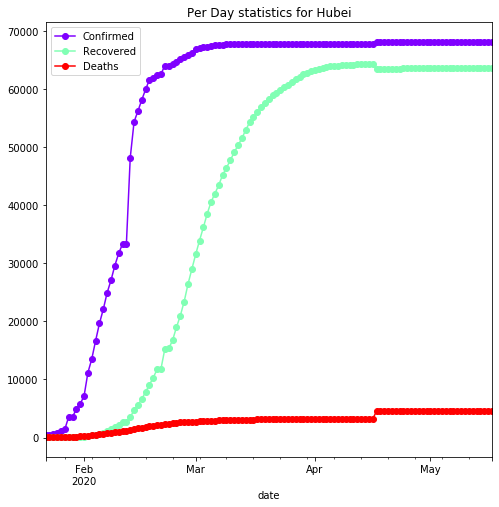

In [24]:
hubei_cases_complete=df.loc[df['Province/State']=='Hubei']
hubei_cases_complete['date'] = hubei_cases_complete['ObservationDate'].dt.date
hubei_cases_complete['date']=pd.to_datetime(hubei_cases_complete['date'])
hubei_cases_complete = hubei_cases_complete[hubei_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = hubei_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Hubei',colormap='rainbow',marker='o')
plt.show()

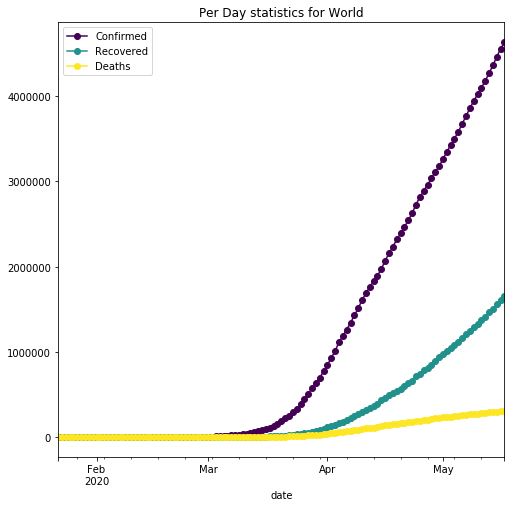

In [25]:
global_cases_complete=df.loc[~(df['Country/Region']=='China')]
global_cases_complete['date'] = global_cases_complete['ObservationDate'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

In [26]:
num_plot_global=num_plot.reset_index()
num_plot_global['Death Case Increase']=0
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
num_plot_global['Death Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
    num_plot_global['Death Case Increase'][i]=-(num_plot_global.iloc[i-1][3]-num_plot_global.iloc[i][3])
num_plot_global.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
112 2020-05-13    4264089    1470352  292564                 5233   
113 2020-05-14    4359230    1509684  297785                 5221   
114 2020-05-15    4459406    1558848  303033                 5248   
115 2020-05-16    4551121    1614970  307147                 4114   
116 2020-05-17    4630666    1655725  310551                 3404   

     Confirmed Case Increase  
112                    85060  
113                    95141  
114                   100176  
115                    91715  
116                    79545

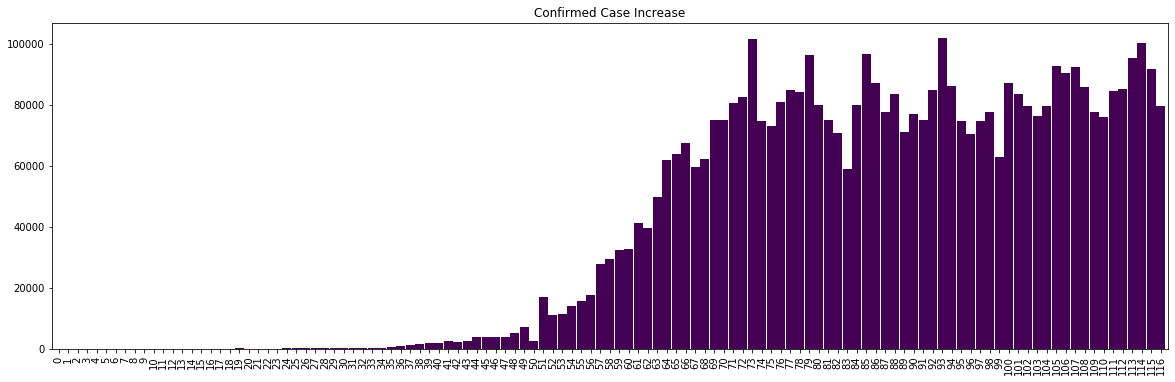

In [27]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.show()

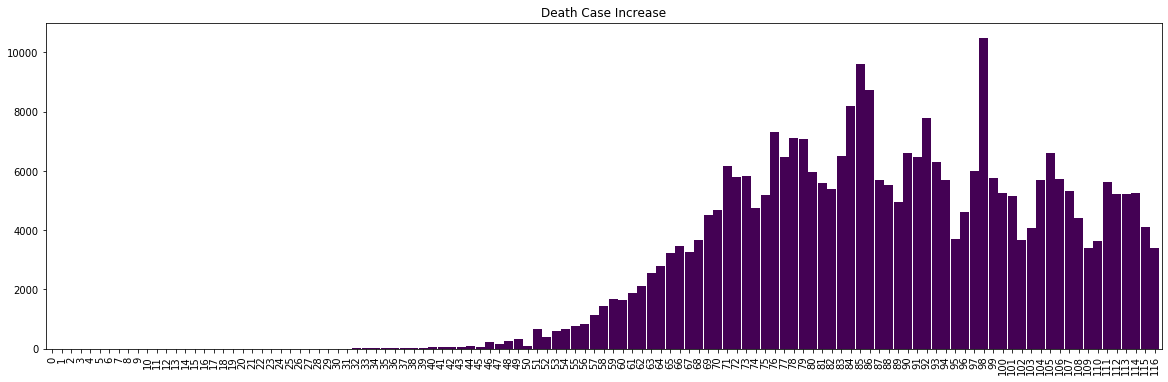

In [28]:
num_plot_global['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='viridis')
plt.show()

In [29]:
italy_cases_complete=df.loc[df['Country/Region']=='Italy']
italy_cases_complete['date'] = italy_cases_complete['ObservationDate'].dt.date
italy_cases_complete['date']=pd.to_datetime(italy_cases_complete['date'])
italy_cases_complete = italy_cases_complete[italy_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = italy_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Italy',marker='o')
plt.show()

In [30]:
num_plot_italy=num_plot.reset_index()
num_plot_italy['Death Case Increase']=0
num_plot_italy['Confirmed Case Increase']=0
num_plot_italy['Confirmed Case Increase'][0]=0
num_plot_italy['Death Case Increase'][0]=0
for i in range(1,num_plot_italy.shape[0]):
    num_plot_italy['Confirmed Case Increase'][i]=-(num_plot_italy.iloc[i-1][1]-num_plot_italy.iloc[i][1])
    num_plot_italy['Death Case Increase'][i]=-(num_plot_italy.iloc[i-1][3]-num_plot_italy.iloc[i][3])
num_plot_italy.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
103 2020-05-13     222104     112541   31106                  195   
104 2020-05-14     223096     115288   31368                  262   
105 2020-05-15     223885     120205   31610                  242   
106 2020-05-16     224760     122810   31763                  153   
107 2020-05-17     225435     125176   31908                  145   

     Confirmed Case Increase  
103                      888  
104                      992  
105                      789  
106                      875  
107                      675

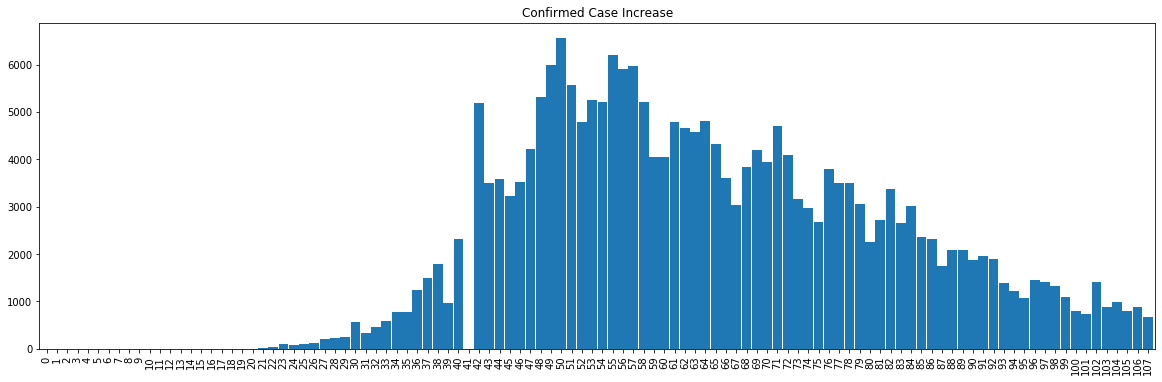

In [31]:
num_plot_italy['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase')
plt.show()

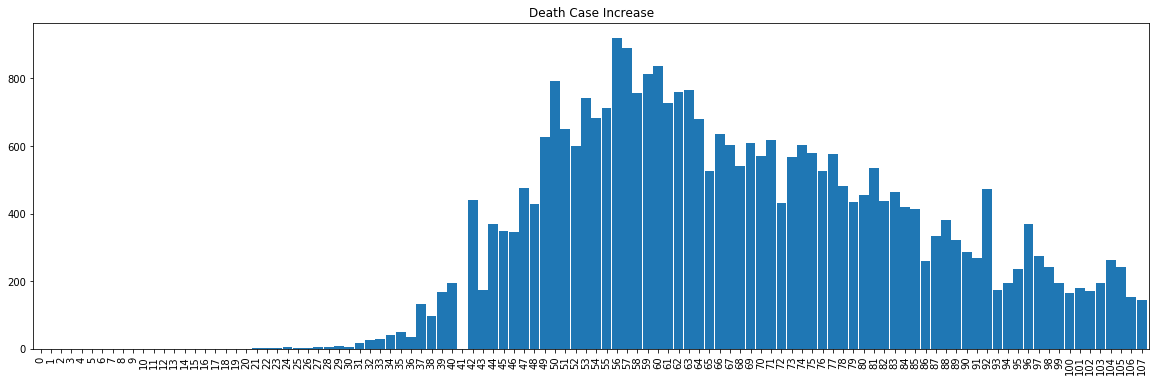

In [32]:
num_plot_italy['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase')
plt.show()

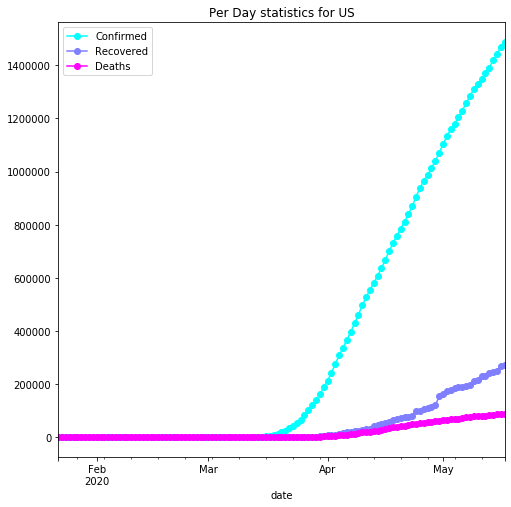

In [33]:
us_cases_complete=df.loc[df['Country/Region']=='US']
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date']=pd.to_datetime(us_cases_complete['date'])
us_cases_complete = us_cases_complete[us_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = us_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for US',colormap='cool',marker='o')
plt.show()

In [34]:
num_plot_us=num_plot.reset_index()
num_plot_us['Death Case Increase']=0
num_plot_us['Confirmed Case Increase']=0
num_plot_us['Confirmed Case Increase'][0]=0
num_plot_us['Death Case Increase'][0]=0
for i in range(1,num_plot_us.shape[0]):
    num_plot_us['Confirmed Case Increase'][i]=-(num_plot_us.iloc[i-1][1]-num_plot_us.iloc[i][1])
    num_plot_us['Death Case Increase'][i]=-(num_plot_us.iloc[i-1][3]-num_plot_us.iloc[i][3])
num_plot_us.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
112 2020-05-13    1390406     243430   84119                 1743   
113 2020-05-14    1417774     246414   85898                 1779   
114 2020-05-15    1442824     250747   87530                 1632   
115 2020-05-16    1467820     268376   88754                 1224   
116 2020-05-17    1486757     272265   89562                  808   

     Confirmed Case Increase  
112                    20832  
113                    27368  
114                    25050  
115                    24996  
116                    18937

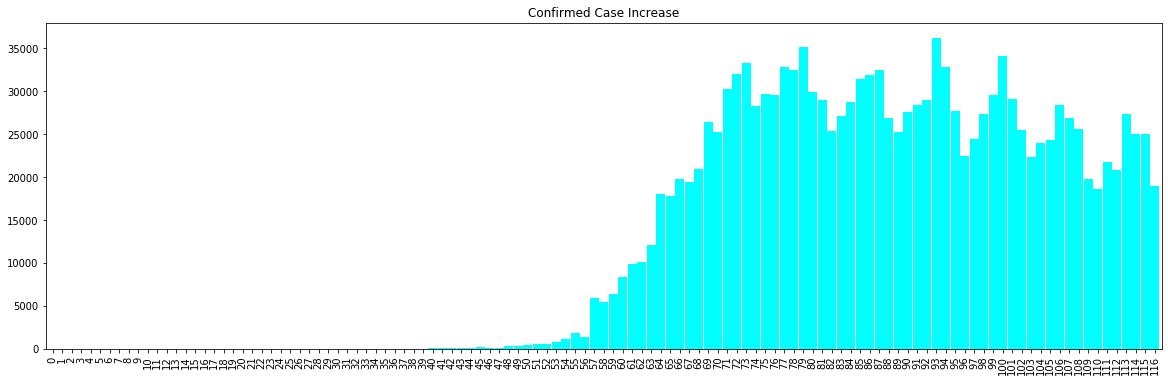

In [35]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='cool',title='Confirmed Case Increase')
plt.show()

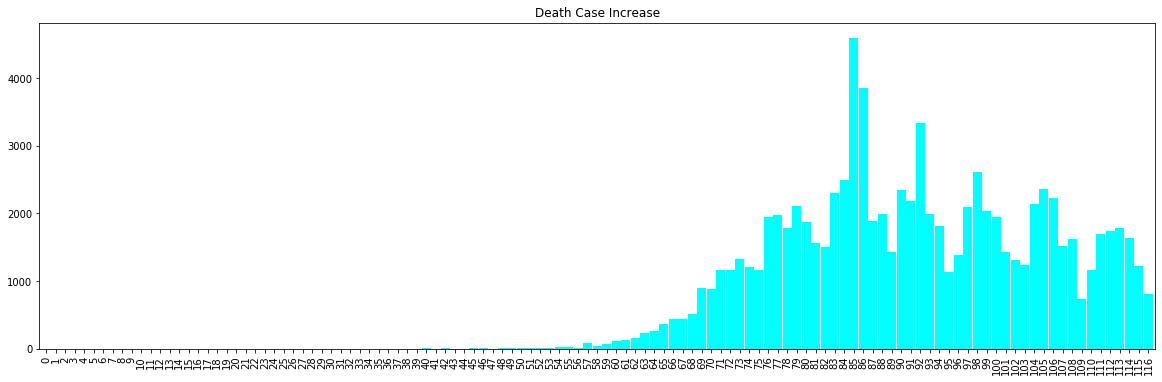

In [36]:
num_plot_us['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='cool',title='Death Case Increase')
plt.show()

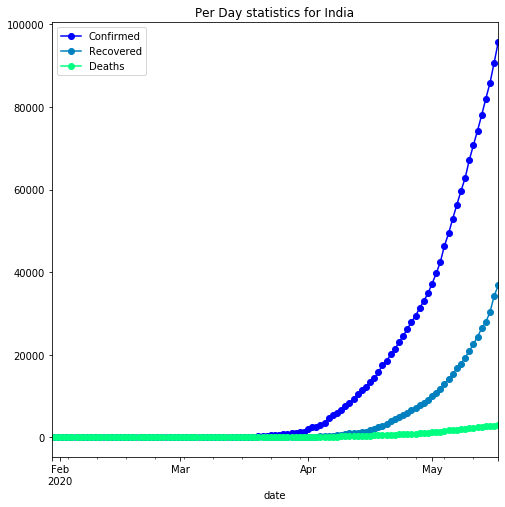

In [37]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India',marker='o')
num_plot_india=num_plot.reset_index()

In [38]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
num_plot_india['Confirmed Case Increase'][0]=0
num_plot_india['Death Case Increase'][0]=0
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

date  Confirmed  Recovered  Deaths  Confirmed Case Increase  \
99  2020-05-08      59695      17887    1985                     3344   
100 2020-05-09      62808      19301    2101                     3113   
101 2020-05-10      67161      20969    2212                     4353   
102 2020-05-11      70768      22549    2294                     3607   
103 2020-05-12      74292      24420    2415                     3524   
104 2020-05-13      78055      26400    2551                     3763   
105 2020-05-14      81997      27969    2649                     3942   
106 2020-05-15      85784      30258    2753                     3787   
107 2020-05-16      90648      34224    2871                     4864   
108 2020-05-17      95698      36795    3025                     5050   

     Death Case Increase  
99                    96  
100                  116  
101                  111  
102                   82  
103                  121  
104                  136  
105                   98  
106                  104  
107                  118  
108                  154

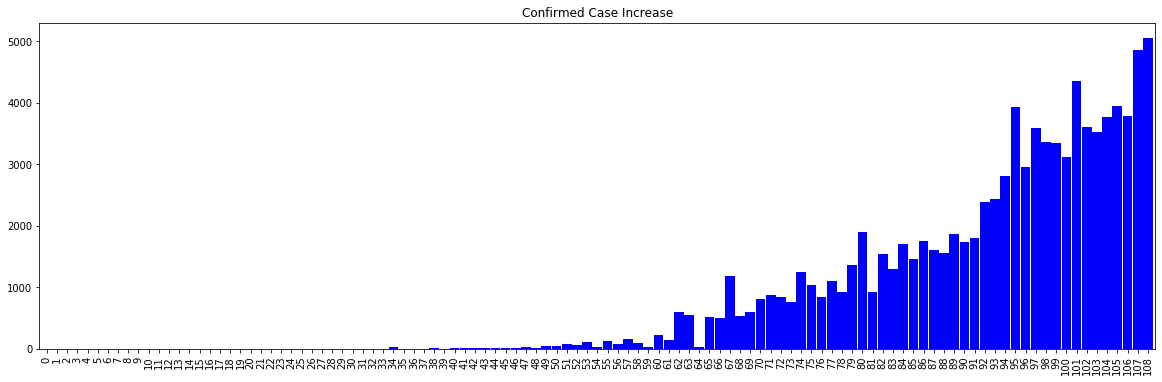

In [39]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()

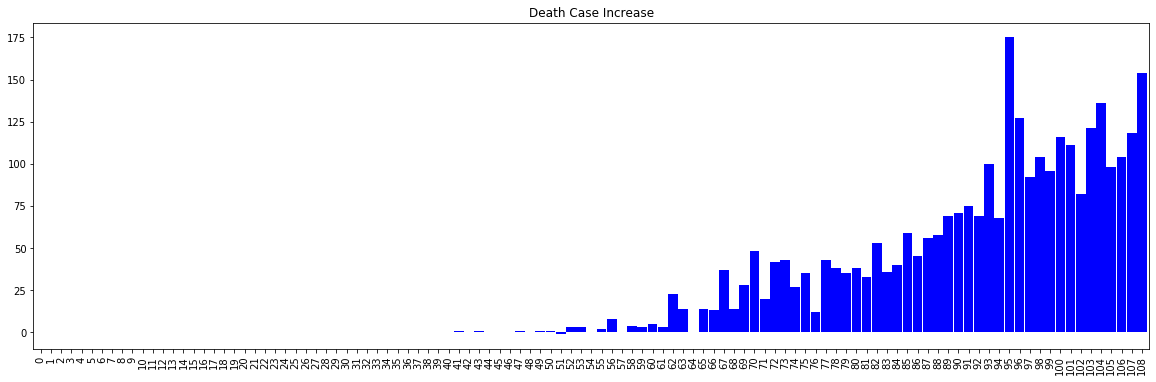

In [40]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Death Case Increase')
plt.show()

In [41]:
#!pip install plotly

In [42]:
from plotly.offline import iplot, init_notebook_mode
import math
import bokeh 
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
import json
from dateutil import parser
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
output_notebook(resources=INLINE)
le=LabelEncoder()

df.rename(columns={'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)
df = df.fillna('unknown')
df['Country'] = df['Country'].str.replace('US','United States')
df['Country'] = df['Country'].str.replace('UK','United Kingdom') 
df['Country'] = df['Country'].str.replace('Mainland China','China')
df['Code']=le.fit_transform(df['Country'])
virus_data = df


top_country = virus_data.loc[virus_data['Date'] == virus_data['Date'].iloc[-1]]
top_country = top_country.groupby(['Code','Country'])['Confirmed'].sum().reset_index()
top_country = top_country.sort_values('Confirmed', ascending=False)
top_country = top_country[:100]
top_country_codes = top_country['Country']
top_country_codes = list(top_country_codes)

countries = virus_data[virus_data['Country'].isin(top_country_codes)]
countries_day = countries.groupby(['Date','Code','Country'])['Confirmed','Deaths','Recovered'].sum().reset_index()
exponential_line_x = []
exponential_line_y = []
for i in range(16):
    exponential_line_x.append(i)
    exponential_line_y.append(i)

china = countries_day.loc[countries_day['Code']==43]

new_confirmed_cases_china = []
new_confirmed_cases_china.append( list(china['Confirmed'])[0] - list(china['Deaths'])[0] 
                           - list(china['Recovered'])[0] )

for i in range(1,len(china)):

    new_confirmed_cases_china.append( list(china['Confirmed'])[i] - 
                                     list(china['Deaths'])[i] - 
                                     list(china['Recovered'])[i])
    
    
italy = countries_day.loc[countries_day['Code']==102]
new_confirmed_cases_ita = []
new_confirmed_cases_ita.append( list(italy['Confirmed'])[0] - list(italy['Deaths'])[0] 
                           - list(italy['Recovered'])[0] )

for i in range(1,len(italy)):
    
    new_confirmed_cases_ita.append( list(italy['Confirmed'])[i] - 
                                  list(italy['Deaths'])[i] - 
                                  list(italy['Recovered'])[i])
    
    
skorea = countries_day.loc[countries_day['Code']==186]

new_confirmed_cases_skorea = []
new_confirmed_cases_skorea.append( list(skorea['Confirmed'])[0] - list(skorea['Deaths'])[0] 
                           - list(skorea['Recovered'])[0] )

for i in range(1,len(skorea)):
    
    new_confirmed_cases_skorea.append( list(skorea['Confirmed'])[i] - 
                                     list(skorea['Deaths'])[i] - 
                                    list(skorea['Recovered'])[i])
    india = countries_day.loc[countries_day['Code']==96]

new_confirmed_cases_india = []
new_confirmed_cases_india.append( list(india['Confirmed'])[0] - list(india['Deaths'])[0] 
                           - list(india['Recovered'])[0] )

for i in range(1,len(india)):
    
    new_confirmed_cases_india.append( list(india['Confirmed'])[i] - 
                                     list(india['Deaths'])[i] - 
                                    list(india['Recovered'])[i])
    

spain = countries_day.loc[countries_day['Code']==188]

new_confirmed_cases_spain = []
new_confirmed_cases_spain.append( list(spain['Confirmed'])[0] - list(spain['Deaths'])[0] 
                           - list(spain['Recovered'])[0] )

for i in range(1,len(spain)):
      
    new_confirmed_cases_spain.append( list(spain['Confirmed'])[i] - 
                                     list(spain['Deaths'])[i] - 
                                    list(spain['Recovered'])[i])
    

us = countries_day.loc[countries_day['Code']==211]

new_confirmed_cases_us = []
new_confirmed_cases_us.append( list(us['Confirmed'])[0] - list(us['Deaths'])[0] 
                           - list(us['Recovered'])[0] )

for i in range(1,len(us)):
    
    new_confirmed_cases_us.append( list(us['Confirmed'])[i] - 
                                     list(us['Deaths'])[i] - 
                                    list(us['Recovered'])[i])
    
    
german = countries_day.loc[countries_day['Code']==77]

new_confirmed_cases_german = []
new_confirmed_cases_german.append( list(german['Confirmed'])[0] - list(german['Deaths'])[0] 
                           - list(german['Recovered'])[0] )

for i in range(1,len(german)):
     new_confirmed_cases_german.append( list(german['Confirmed'])[i] - 
                                     list(german['Deaths'])[i] - 
                                    list(german['Recovered'])[i])
    
p1=figure(plot_width=800, plot_height=550, title="COVID 2019 Trajectories for Countries")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Total number of Confirmed Cases (Log scale)'
p1.yaxis.axis_label = 'Total number of active cases (Log scale)'


p1.line(exponential_line_x, exponential_line_y, line_dash="4 4", line_width=1)

p1.line(np.log(list(china['Confirmed'])), np.log(new_confirmed_cases_china), color='red', 
        legend_label='China', line_width=3)
p1.circle(np.log(list(china['Confirmed'])[-1]), np.log(new_confirmed_cases_china[-1]), size=5)

p1.line(np.log(list(italy['Confirmed'])), np.log(new_confirmed_cases_ita), color='blue', 
        legend_label='Italy', line_width=3)
p1.circle(np.log(list(italy['Confirmed'])[-1]), np.log(new_confirmed_cases_ita[-1]), size=5)
p1.line(np.log(list(skorea['Confirmed'])), np.log(new_confirmed_cases_skorea), color='violet', 
        legend_label='South Korea', line_width=3)
p1.circle(np.log(list(skorea['Confirmed'])[-1]), np.log(new_confirmed_cases_skorea[-1]), size=5)


p1.line(np.log(list(india['Confirmed'])), np.log(new_confirmed_cases_india), color='orange', 
        legend_label='India', line_width=3)
p1.circle(np.log(list(india['Confirmed'])[-1]), np.log(new_confirmed_cases_india[-1]), size=5)

p1.line(np.log(list(spain['Confirmed'])), np.log(new_confirmed_cases_spain), color='brown', 
        legend_label='Spain', line_width=3)
p1.circle(np.log(list(spain['Confirmed'])[-1]), np.log(new_confirmed_cases_spain[-1]), size=5)

p1.line(np.log(list(us['Confirmed'])), np.log(new_confirmed_cases_us), color='green', 
        legend_label='United States', line_width=3)
p1.circle(np.log(list(us['Confirmed'])[-1]), np.log(new_confirmed_cases_us[-1]), size=5)

p1.line(np.log(list(german['Confirmed'])), np.log(new_confirmed_cases_german), color='black', 
        legend_label='Germany', line_width=3)
p1.circle(np.log(list(german['Confirmed'])[-1]), np.log(new_confirmed_cases_german[-1]), size=5)

p1.legend.location = "bottom_right"
#output_file("coronavirus.html", title="COVID2019 Trajectory")
show(p1)

Loading BokehJS ...

In [43]:
import requests
import io
age_group = pd.read_csv('C:\\Users\\hp\\Downloads\\project\\major\\AgeGroupDetails.csv')
india_covid = pd.read_csv('C:\\Users\\hp\\Downloads\\project\\major\\covid_19_india.csv')
india_covid.to_csv('india_cases.csv',date_format='%Y-%m-%d')
india_covid_19=pd.read_csv('india_cases.csv')
hospital_beds = pd.read_csv('C:\\Users\\hp\\Downloads\\project\\major\\HospitalBedsIndia.csv')
individual_details = pd.read_csv('C:\\Users\\hp\\Downloads\\project\\major\\IndividualDetails.csv')
ICMR_labs = pd.read_csv('C:\\Users\\hp\\Downloads\\project\\major\\ICMRTestingLabs.csv')
state_testing = pd.read_csv('C:\\Users\\hp\\Downloads\\project\\major\\StatewiseTestingDetails.csv')
india_covid_19.tail()

Unnamed: 0   Sno      Date     Time State/UnionTerritory  \
2062        2062  2063  18/05/20  8:00 AM            Telengana   
2063        2063  2064  18/05/20  8:00 AM              Tripura   
2064        2064  2065  18/05/20  8:00 AM          Uttarakhand   
2065        2065  2066  18/05/20  8:00 AM        Uttar Pradesh   
2066        2066  2067  18/05/20  8:00 AM          West Bengal   

     ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
2062                       -                        -    992      34   
2063                       -                        -     85       0   
2064                       -                        -     52       1   
2065                       -                        -   2441     104   
2066                       -                        -    959     238   

      Confirmed  
2062       1551  
2063        167  
2064         92  
2065       4259  
2066       2677

In [44]:
india_covid_19.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)
unassigned=india_covid_19[india_covid_19['State']=='Unassigned'].index
india_covid_19.drop(unassigned,axis=0,inplace=True)
unassigned1=india_covid_19[india_covid_19['State']=='Nagaland#'].index
india_covid_19.drop(unassigned1,axis=0,inplace=True)
unassigned2=india_covid_19[india_covid_19['State']=='Jharkhand#'].index
india_covid_19.drop(unassigned2,axis=0,inplace=True)
unassigned3=india_covid_19[india_covid_19['State']=='Madhya Pradesh#'].index
india_covid_19.drop(unassigned3,axis=0,inplace=True)
unassigned4=india_covid_19[india_covid_19['State']=='Cases being reassigned to states'].index
india_covid_19.drop(unassigned4,axis=0,inplace=True)

In [45]:
statewise_cases = pd.DataFrame(india_covid_19.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" 
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',color='Confirmed', hover_data=['State'])
fig.show()

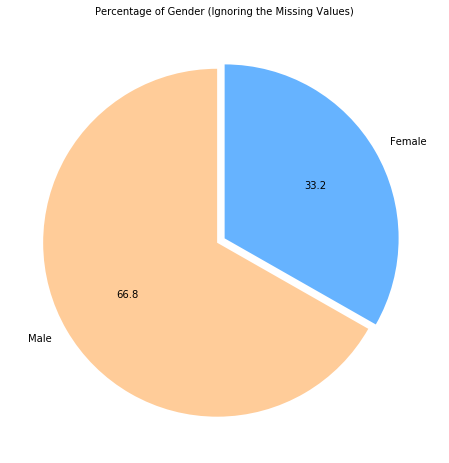

In [46]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode = (0.05, 0)
colors = ['#ffcc99','#66b3ff']
plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 10)
plt.show ()

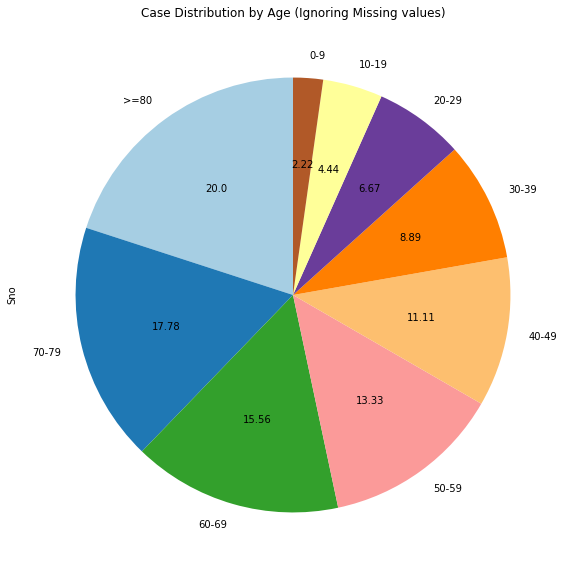

In [47]:
fig = plt.figure(figsize=(10,10))
age_group=age_group.iloc[0:9,:]
age_dist_india = age_group.groupby('AgeGroup')['Sno'].sum().sort_values(ascending=False)
def absolute_value(val):
    a  = val
    return (np.round(a,2))
age_dist_india.plot(kind="pie",title='Case Distribution by Age (Ignoring Missing values)',autopct=absolute_value,colormap='Paired',startangle=90)

plt.show ()

In [48]:
india_covid_19['Deaths']=india_covid_19['Deaths'].replace(['0#','NaN'],0)
india_covid_19['Deaths']=india_covid_19['Deaths'].astype('int')

In [49]:
state_details = pd.pivot_table(india_covid_19, values=['Confirmed','Deaths','Recovered'], index='State', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Recovered'] / state_details['Confirmed'],2)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Purples')

In [50]:
state_testing.head()

Date                        State  TotalSamples  Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0    1210.0      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0       NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0       NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0       NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0       NaN      33.0

In [51]:
testing=state_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

In [52]:
state_testing=state_testing.fillna(0)
state_test_details = pd.pivot_table(state_testing, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
state_test_details['Positive Test Rate'] = round(state_test_details['Positive'] / state_test_details['TotalSamples'],2)
state_test_details = state_test_details.sort_values(by='TotalSamples', ascending= False)
state_test_details.style.background_gradient(cmap='Blues')

In [53]:
values = list(ICMR_labs['state'].value_counts())
states = list(ICMR_labs['state'].value_counts().index)
labs = pd.DataFrame(list(zip(values, states)), 
               columns =['values', 'states'])
fig = px.bar(labs, 
             x="values",
             y="states", 
             orientation='h',
             height=1000,
             title='Statewise Labs',
            color='states')
fig.show()

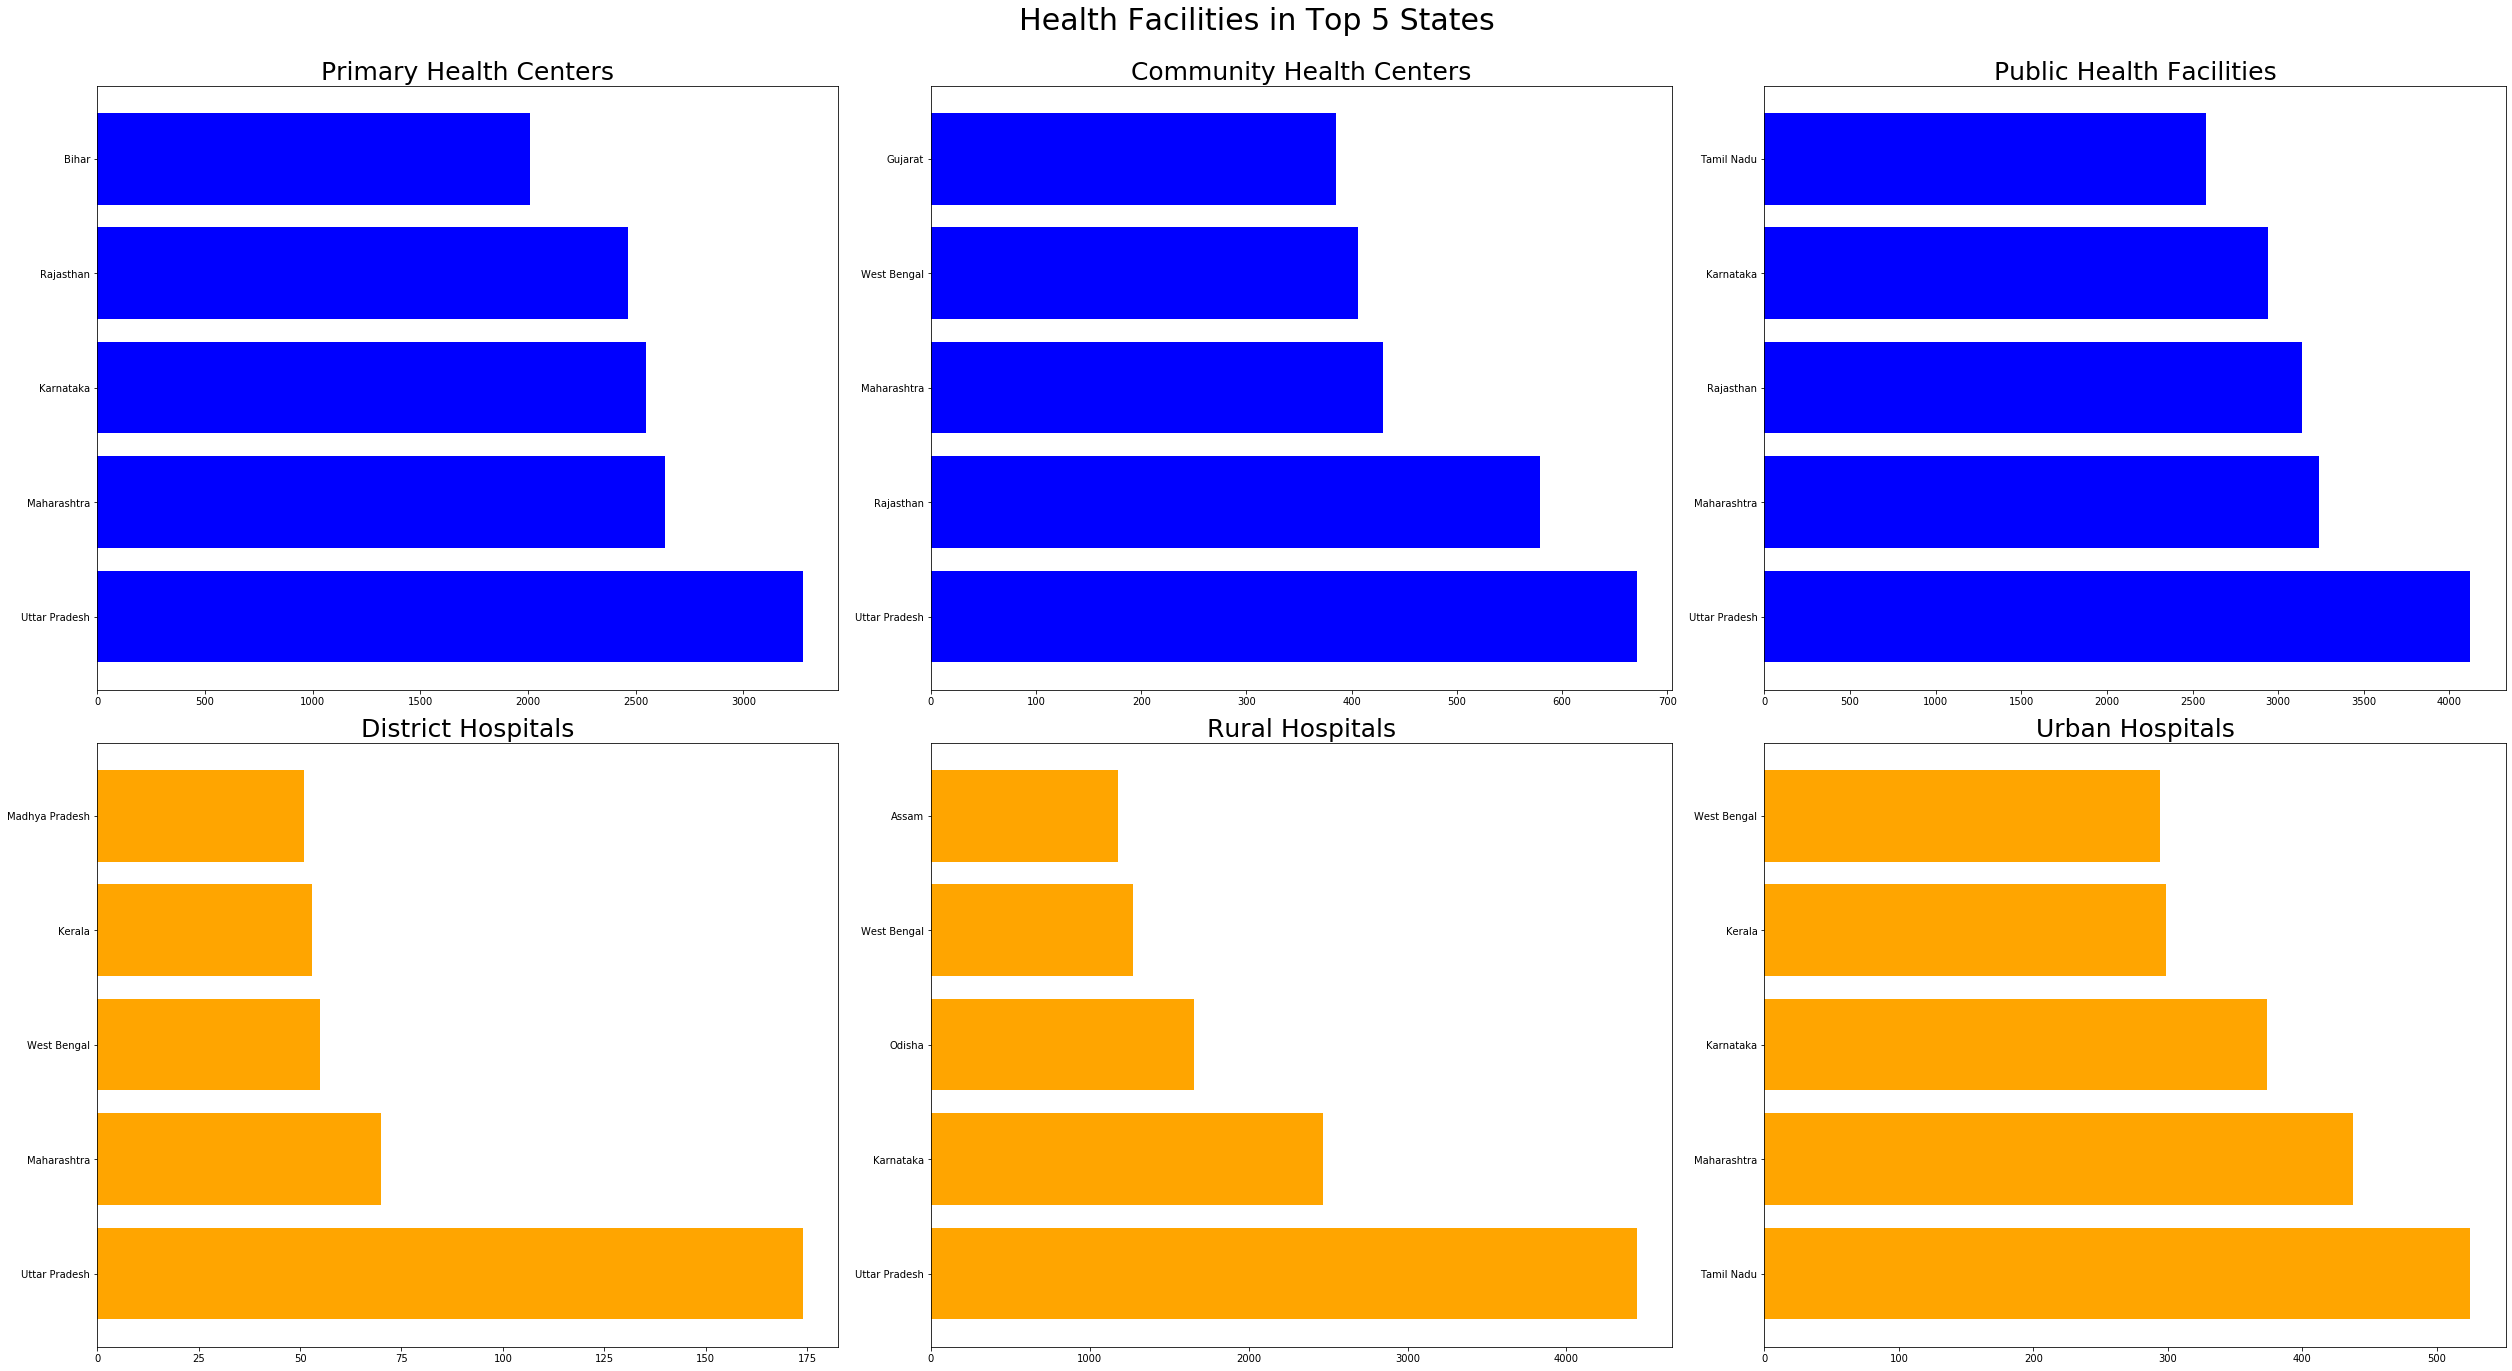

In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
hospital_beds_states =hospital_beds.drop([36])
cols_object = list(hospital_beds_states.columns[2:8])
for cols in cols_object:
    hospital_beds_states[cols] = hospital_beds_states[cols].astype(int,errors = 'ignore')
top_5_primary = hospital_beds_states.nlargest(5,'NumPrimaryHealthCenters_HMIS')
top_5_community = hospital_beds_states.nlargest(5,'NumCommunityHealthCenters_HMIS')
top_5_district_hospitals = hospital_beds_states.nlargest(5,'NumDistrictHospitals_HMIS')
top_5_public_facility = hospital_beds_states.nlargest(5,'TotalPublicHealthFacilities_HMIS')
top_5_public_beds = hospital_beds_states.nlargest(5,'NumPublicBeds_HMIS')
top_rural_hos = hospital_beds_states.nlargest(5,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds_states.nlargest(5,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds_states.nlargest(5,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds_states.nlargest(5,'NumUrbanBeds_NHP18')

plt.figure(figsize=(35,20))
plt.suptitle('Health Facilities in Top 5 States',fontsize=30)
plt.subplot(231)
plt.title('Primary Health Centers',fontsize=25)
plt.barh(top_5_primary['State/UT'],top_5_primary['NumPrimaryHealthCenters_HMIS'],color ='blue');

plt.subplot(232)
plt.title('Community Health Centers',fontsize=25)
plt.barh(top_5_community['State/UT'],top_5_community['NumCommunityHealthCenters_HMIS'],color = 'blue');

plt.subplot(233)
plt.title('Public Health Facilities',fontsize=25)
plt.barh(top_5_public_facility['State/UT'],top_5_public_facility['TotalPublicHealthFacilities_HMIS'],color='blue');

plt.subplot(234)
plt.title('District Hospitals',fontsize=25)
plt.barh(top_5_district_hospitals['State/UT'],top_5_district_hospitals['NumDistrictHospitals_HMIS'],color = 'orange');

plt.subplot(235)
plt.title('Rural Hospitals',fontsize=25)
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = 'orange');
plt.subplot(236)
plt.title('Urban Hospitals',fontsize=25)
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = 'orange');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

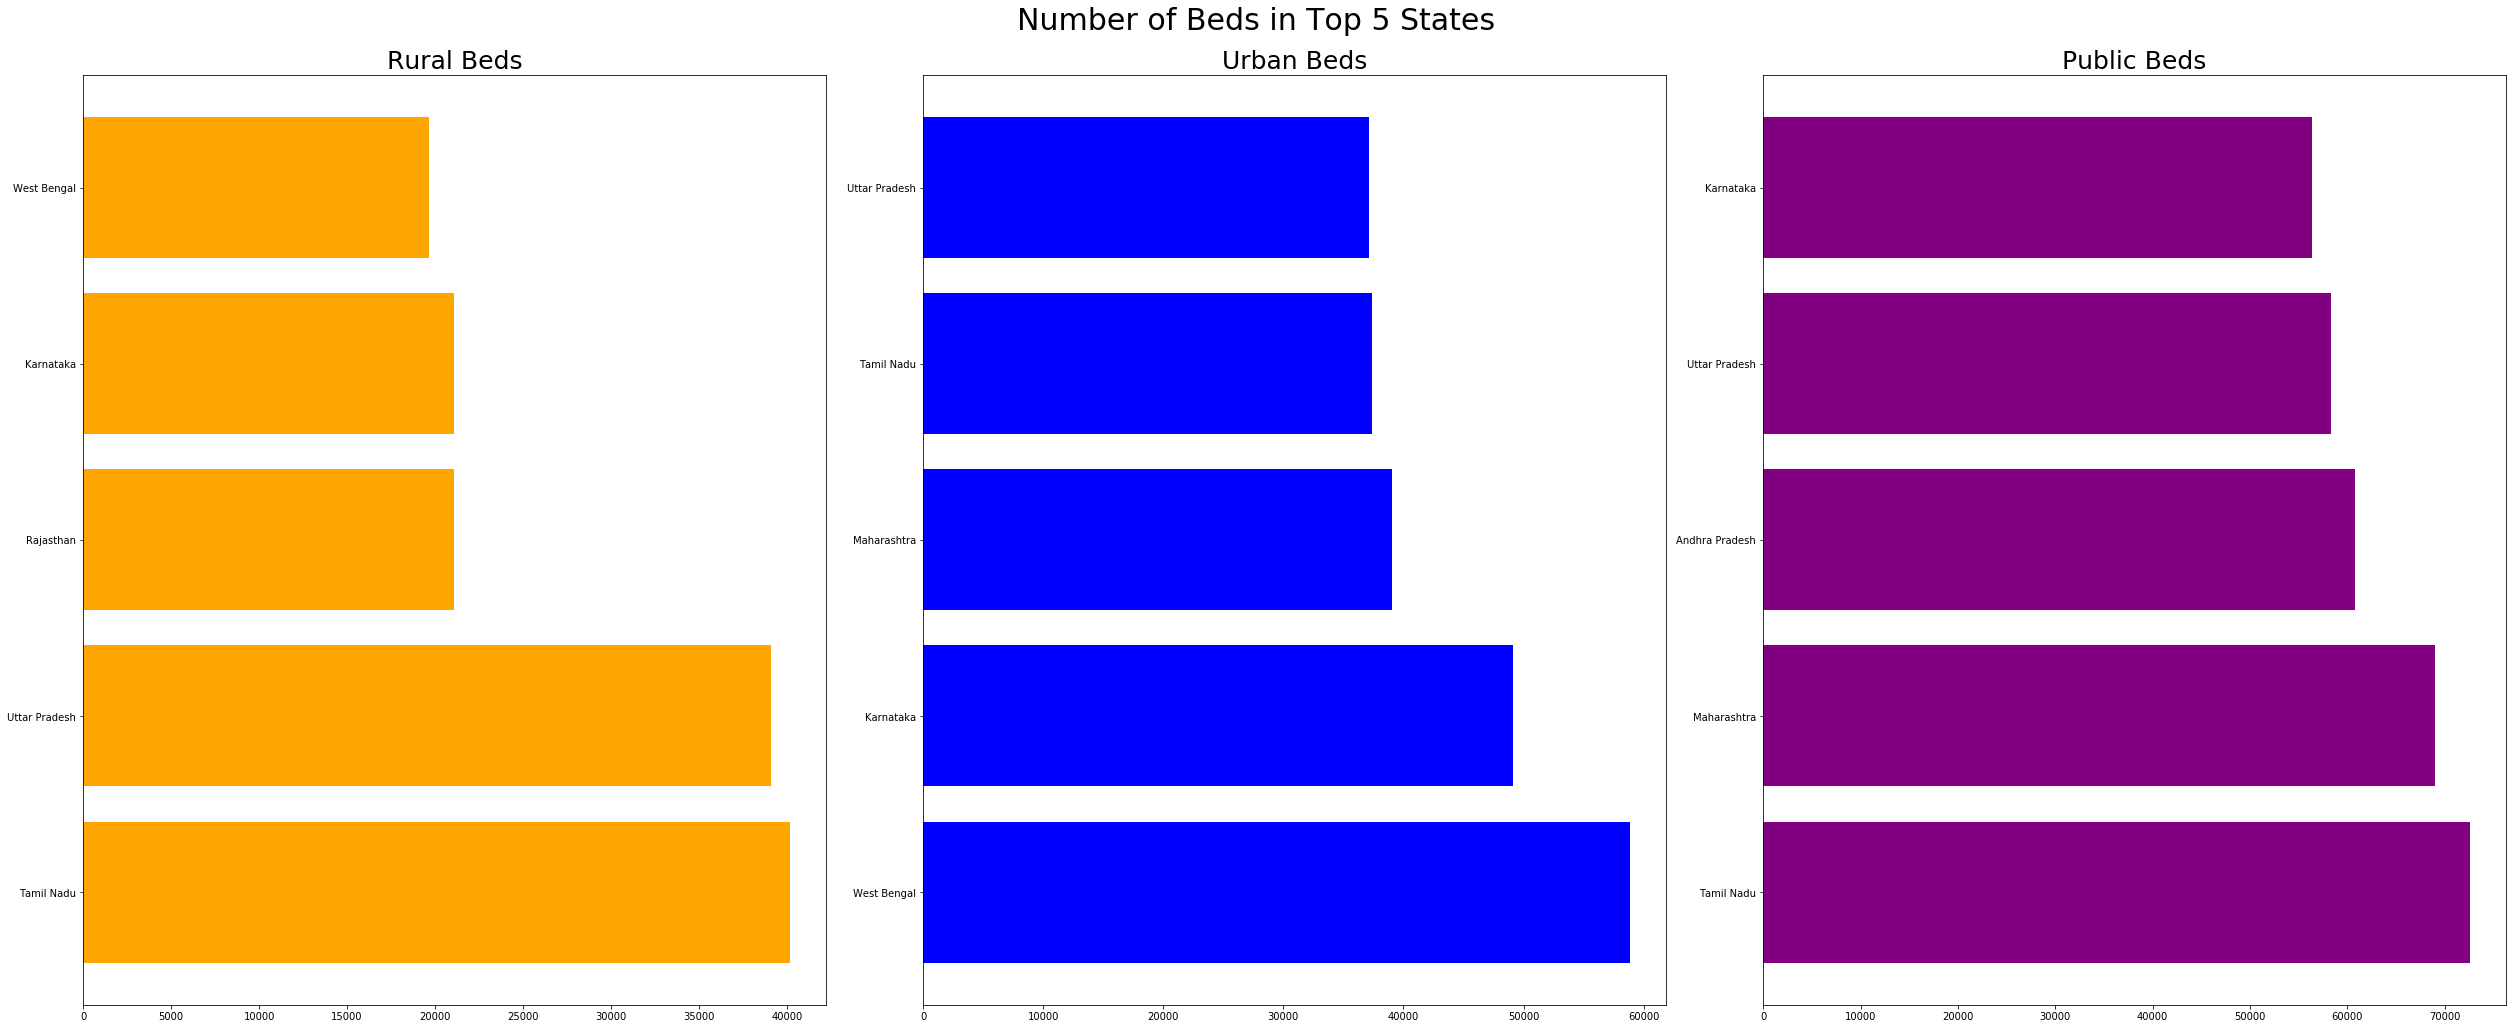

In [55]:
plt.figure(figsize=(35,15))
plt.suptitle('Number of Beds in Top 5 States',fontsize=30);
plt.subplot(131)
plt.title('Rural Beds',fontsize=25)
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = 'orange');

plt.subplot(132)
plt.title('Urban Beds',fontsize=25)
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = 'blue');
plt.subplot(133)
plt.title('Public Beds',fontsize=25)
plt.barh(top_5_public_beds['State/UT'],top_5_public_beds['NumPublicBeds_HMIS'],color = 'purple');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

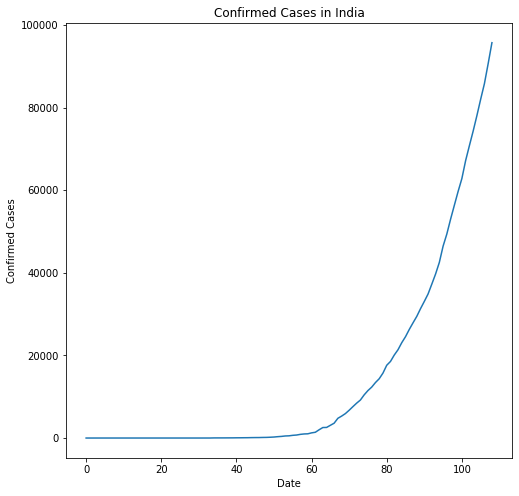

In [56]:
ax = num_plot_india['Confirmed'].plot(title="Confirmed Cases in India",figsize=(8,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [57]:
train = num_plot_india.iloc[:-3,:2]
test = num_plot_india.iloc[-3:,:2]

In [58]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [59]:
#!pip install fbprophet

In [60]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.4, changepoints=['2020-04-14','2020-04-25','2020-05-09','2020-05-14'])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


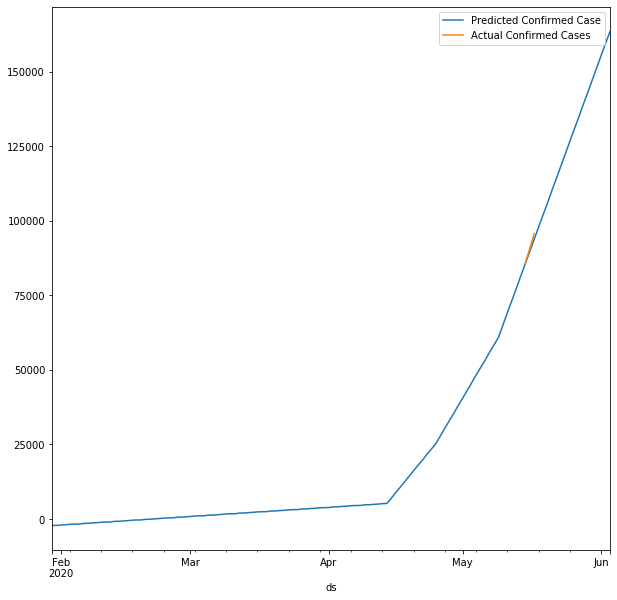

In [61]:
future_dates = model.make_future_dataframe(periods=20)
forecast =  model.predict(future_dates)
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

In [62]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='90 days', period='40 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-05-11 00:00:00 and 2020-05-11 00:00:00


horizon           mse         rmse          mae      mape     mdape  \
0  1 days  3.029371e+07  5503.972583  5503.972583  0.074086  0.074086   
1  2 days  4.586913e+07  6772.675170  6772.675170  0.086768  0.086768   
2  3 days  6.422439e+07  8014.012070  8014.012070  0.097735  0.097735   

   coverage  
0       0.0  
1       0.0  
2       0.0

In [63]:
forecast.tail(10)

ds          trend     yhat_lower     yhat_upper    trend_lower  \
116 2020-05-25  126625.723444  122475.107805  130480.422085  123742.395053   
117 2020-05-26  130732.482696  126358.944305  134393.732763  127300.755170   
118 2020-05-27  134839.241947  130283.716518  139146.474621  130661.377266   
119 2020-05-28  138946.001198  133745.771669  143696.266398  134037.283230   
120 2020-05-29  143052.760450  137023.698759  148378.720235  137270.964579   
121 2020-05-30  147159.519701  140371.198387  153539.228019  140512.776462   
122 2020-05-31  151266.278953  143699.885456  158420.476465  143965.463625   
123 2020-06-01  155373.038204  147503.902431  163639.311674  147416.407584   
124 2020-06-02  159479.797456  149791.654205  168613.572884  150488.217834   
125 2020-06-03  163586.556707  153403.778177  174128.979019  153871.126317   

       trend_upper  additive_terms  additive_terms_lower  \
116  128951.004131       41.967365             41.967365   
117  133696.100338       13.752716             13.752716   
118  138293.001633      -70.306867            -70.306867   
119  143017.796120       46.165216             46.165216   
120  147792.788300      -27.486887            -27.486887   
121  152617.010077        0.175076              0.175076   
122  157937.686091       -4.266619             -4.266619   
123  163092.279882       41.967365             41.967365   
124  168096.796546       13.752716             13.752716   
125  173046.005740      -70.306867            -70.306867   

     additive_terms_upper     weekly  weekly_lower  weekly_upper  \
116             41.967365  41.967365     41.967365     41.967365   
117             13.752716  13.752716     13.752716     13.752716   
118            -70.306867 -70.306867    -70.306867    -70.306867   
119             46.165216  46.165216     46.165216     46.165216   
120            -27.486887 -27.486887    -27.486887    -27.486887   
121              0.175076   0.175076      0.175076      0.175076   
122             -4.266619  -4.266619     -4.266619     -4.266619   
123             41.967365  41.967365     41.967365     41.967365   
124             13.752716  13.752716     13.752716     13.752716   
125            -70.306867 -70.306867    -70.306867    -70.306867   

     multiplicative_terms  multiplicative_terms_lower  \
116                   0.0                         0.0   
117                   0.0                         0.0   
118                   0.0                         0.0   
119                   0.0                         0.0   
120                   0.0                         0.0   
121                   0.0                         0.0   
122                   0.0                         0.0   
123                   0.0                         0.0   
124                   0.0                         0.0   
125                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
116                         0.0  126667.690809  
117                         0.0  130746.235412  
118                         0.0  134768.935080  
119                         0.0  138992.166415  
120                         0.0  143025.273563  
121                         0.0  147159.694777  
122                         0.0  151262.012334  
123                         0.0  155415.005569  
124                         0.0  159493.550172  
125                         0.0  163516.249840

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


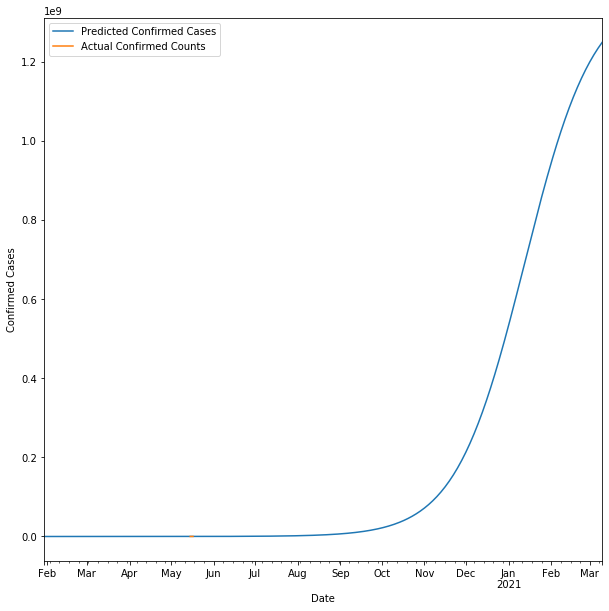

In [64]:
from fbprophet import Prophet
model_india = Prophet(growth="logistic",changepoint_prior_scale=0.4,changepoints=['2020-04-14','2020-04-25','2020-05-09','2020-05-05','2020-05-14'])
pop = 1380004385 #from worldometers
train['cap'] = pop
model_india.fit(train)
# Future Prediction
future_dates = model_india.make_future_dataframe(periods=300)
future_dates['cap'] = pop
forecast =  model_india.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Cases',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Confirmed Cases");

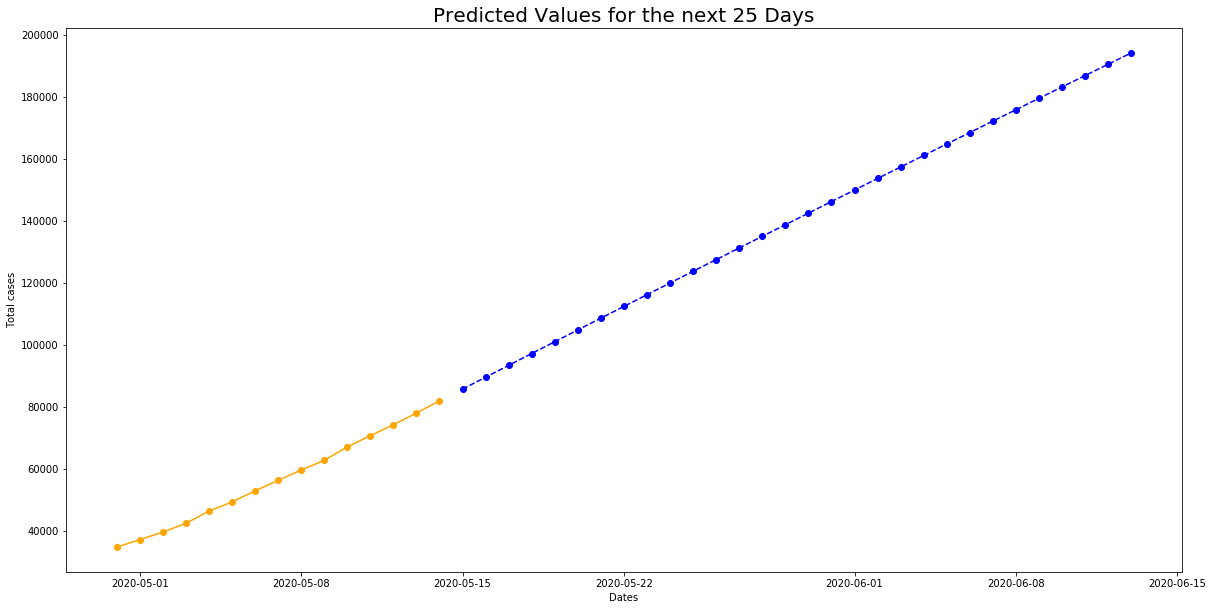

In [65]:
from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(train['y'], order=(3, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])
start_date = train['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 25 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

In [66]:
pred=pd.DataFrame(forecast[0],columns=['Predicted'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df=pd.merge(dates,pred,right_index=True,left_index=True)
arima_df.tail(15)

Date      Predicted
15 2020-05-30  142483.698099
16 2020-05-31  146212.626609
17 2020-06-01  149935.285838
18 2020-06-02  153651.686271
19 2020-06-03  157361.838429
20 2020-06-04  161065.752829
21 2020-06-05  164763.439952
22 2020-06-06  168454.910269
23 2020-06-07  172140.174232
24 2020-06-08  175819.242276
25 2020-06-09  179492.124818
26 2020-06-10  183158.832256
27 2020-06-11  186819.374974
28 2020-06-12  190473.763335
29 2020-06-13  194122.007688

In [67]:
test=test.reset_index()

In [68]:
df1=pd.DataFrame(forecast[0],columns=['yhat'])
df2=pd.DataFrame(prediction_dates,columns=['ds'])
df3=test['y']
df4=pd.merge(df2,df3,right_index=True,left_index=True)
df5=pd.merge(df4,df1,right_index=True,left_index=True)

In [69]:
df5['mse'],df5['rmse'],df5['mae'],df5['mape'],df5['mdape']=[0,0,0,0,0]

In [70]:
for t in range(len(test)):
    mape =  np.mean(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mape'][t]="{:.5f}".format(mape)
    mdape =  np.median(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mdape'][t]="{:.5f}".format(mdape)
    mae = np.mean(np.abs(df5['yhat'][t] - df5['y'][t]))
    df5['mae'][t]=mae
    mse = np.mean((df5['yhat'][t] - df5['y'][t])**2)
    df5['mse'][t]=mse
    rmse = np.mean((df5['yhat'][t] - df5['y'][t])**2)**.5
    df5['rmse'][t]=rmse

In [71]:
df5

ds      y          yhat      mse  rmse   mae     mape    mdape
0 2020-05-15  85784  85779.968371       16     4     4  0.00005  0.00005
1 2020-05-16  90648  89613.945411  1069268  1034  1034  0.01141  0.01141
2 2020-05-17  95698  93434.403925  5123867  2263  2263  0.02365  0.02365

In [72]:
num_plot_india['Active']=0
for i in range(len(num_plot_india)):
    num_plot_india['Active'][i]=num_plot_india['Confirmed'][i]-num_plot_india['Recovered'][i]-num_plot_india['Deaths'][i]
num_plot_india

date  Confirmed  Recovered  Deaths  Confirmed Case Increase  \
0   2020-01-30          1          0       0                        0   
1   2020-01-31          1          0       0                        0   
2   2020-02-01          1          0       0                        0   
3   2020-02-02          2          0       0                        1   
4   2020-02-03          3          0       0                        1   
..         ...        ...        ...     ...                      ...   
104 2020-05-13      78055      26400    2551                     3763   
105 2020-05-14      81997      27969    2649                     3942   
106 2020-05-15      85784      30258    2753                     3787   
107 2020-05-16      90648      34224    2871                     4864   
108 2020-05-17      95698      36795    3025                     5050   

     Death Case Increase  Active  
0                      0       1  
1                      0       1  
2                      0       1  
3                      0       2  
4                      0       3  
..                   ...     ...  
104                  136   49104  
105                   98   51379  
106                  104   52773  
107                  118   53553  
108                  154   55878  

[109 rows x 7 columns]

In [73]:
train_bed=pd.DataFrame(columns=['ds','y'])
test_bed=pd.DataFrame(columns=['ds','y'])
train_bed_y= num_plot_india.iloc[:-5,-1:]
train_bed_ds = num_plot_india.iloc[:-5,:1]
train_bed=pd.merge(train_bed_ds,train_bed_y,right_index=True,left_index=True)
train_bed.rename(columns={'date': 'ds', 'Active': 'y'}, inplace=True)
test_bed_y = num_plot_india.iloc[-5:,-1:]
test_bed_ds = num_plot_india.iloc[-5:,:1]
test_bed=pd.merge(test_bed_ds,test_bed_y,right_index=True,left_index=True)
test_bed.rename(columns={'date': 'ds', 'Active': 'y'}, inplace=True)

In [74]:
test_bed = test_bed.set_index("ds")
test_bed = test_bed['y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


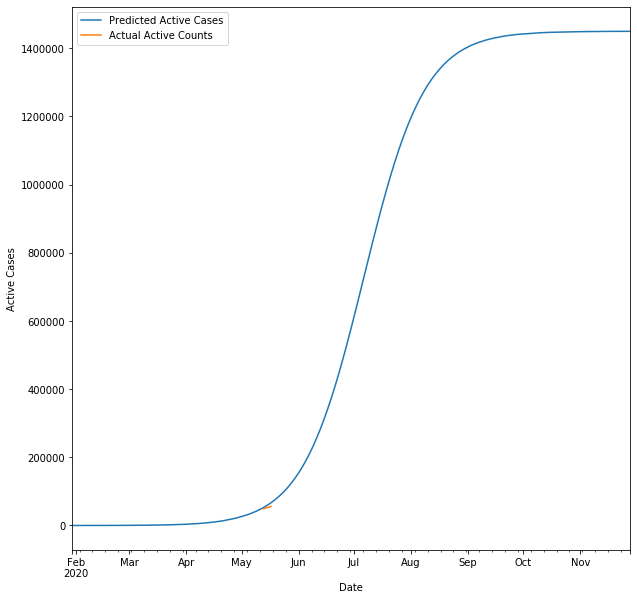

In [75]:
num_bed=hospital_beds.iloc[36][7]+hospital_beds.iloc[36][9]+hospital_beds.iloc[36][11]
model_bed = Prophet(growth = "logistic",changepoints=['2020-04-10','2020-04-20','2020-05-02','2020-05-10'])
bed_cap = num_bed 
train_bed['cap'] = bed_cap
model_bed.fit(train_bed)
# Future Prediction
future_dates = model_bed.make_future_dataframe(periods=200)
future_dates['cap'] = bed_cap
forecast =  model_bed.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Active Cases',legend=True,figsize=(10,10))
test_bed.plot(y='y',label='Actual Active Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Active Cases");

In [76]:
forecast.iloc[150:160]

ds          trend      cap     yhat_lower     yhat_upper  \
150 2020-06-28  548528.428687  1449785  518625.966125  573834.808617   
151 2020-06-29  569243.248042  1449785  538002.879618  596575.805820   
152 2020-06-30  590228.037051  1449785  557494.693575  617288.050209   
153 2020-07-01  611449.234509  1449785  576674.097860  641157.104386   
154 2020-07-02  632871.650813  1449785  596224.431964  663536.815986   
155 2020-07-03  654458.688446  1449785  616492.628772  686636.744580   
156 2020-07-04  676172.583060  1449785  636244.124535  709819.929398   
157 2020-07-05  697974.661955  1449785  656808.192595  731758.761871   
158 2020-07-06  719825.616274  1449785  678421.017846  755137.444338   
159 2020-07-07  741685.782909  1449785  697365.804482  777893.453030   

       trend_lower    trend_upper  additive_terms  additive_terms_lower  \
150  518936.707164  574111.906754       -9.186060             -9.186060   
151  538097.850878  596039.970602       22.373638             22.373638   
152  557532.997472  618459.999912     -103.085659           -103.085659   
153  577227.813506  641098.321172       85.585842             85.585842   
154  596959.692517  663663.855203       48.068454             48.068454   
155  616454.113686  686532.408380       -2.757091             -2.757091   
156  636205.036922  709521.858776      -40.999124            -40.999124   
157  656589.125929  732126.416191       -9.186060             -9.186060   
158  677318.212307  754777.769897       22.373638             22.373638   
159  697672.640776  777604.087030     -103.085659           -103.085659   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
150             -9.186060   -9.186060     -9.186060     -9.186060   
151             22.373638   22.373638     22.373638     22.373638   
152           -103.085659 -103.085659   -103.085659   -103.085659   
153             85.585842   85.585842     85.585842     85.585842   
154             48.068454   48.068454     48.068454     48.068454   
155             -2.757091   -2.757091     -2.757091     -2.757091   
156            -40.999124  -40.999124    -40.999124    -40.999124   
157             -9.186060   -9.186060     -9.186060     -9.186060   
158             22.373638   22.373638     22.373638     22.373638   
159           -103.085659 -103.085659   -103.085659   -103.085659   

     multiplicative_terms  multiplicative_terms_lower  \
150                   0.0                         0.0   
151                   0.0                         0.0   
152                   0.0                         0.0   
153                   0.0                         0.0   
154                   0.0                         0.0   
155                   0.0                         0.0   
156                   0.0                         0.0   
157                   0.0                         0.0   
158                   0.0                         0.0   
159                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
150                         0.0  548519.242627  
151                         0.0  569265.621680  
152                         0.0  590124.951392  
153                         0.0  611534.820351  
154                         0.0  632919.719267  
155                         0.0  654455.931355  
156                         0.0  676131.583936  
157                         0.0  697965.475895  
158                         0.0  719847.989912  
159                         0.0  741582.697251

In [77]:
hospital_beds_active=hospital_beds
hospital_beds_active['Total_Beds']=0

In [78]:
for i in range(len(hospital_beds_active)):
    hospital_beds_active['Total_Beds'][i]=hospital_beds.iloc[i][7]+hospital_beds.iloc[i][9]+hospital_beds.iloc[i][11]

In [79]:
india_covid_19['Active'] = india_covid_19['Confirmed'] - india_covid_19['Deaths']- india_covid_19['Recovered']
india_state_cases=pd.DataFrame()
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],errors='coerce')
states =list(india_covid_19['State'].unique())
for state in states:
    mah_cases_complete=india_covid_19.loc[india_covid_19['State']==state]
    mah_cases_complete['Date'] = mah_cases_complete['Date'].dt.strftime("%Y-%m-%d")
    mah_cases_complete['Date']=pd.to_datetime(mah_cases_complete['Date'])
    mah_cases_complete = mah_cases_complete[(pd.Timestamp(datetime.date(2020,3,21)) < mah_cases_complete['Date']) & ( mah_cases_complete['Date']< pd.Timestamp(datetime.date(2020,7,20)))]
    india_state_cases=india_state_cases.append(mah_cases_complete)

india_state_cases.sample(10)

Unnamed: 0   Sno       Date     Time         State  \
1162        1162  1163 2020-04-21  5:00 PM    Chandigarh   
1626        1626  1627 2020-05-05  5:00 PM     Meghalaya   
1260        1260  1261 2020-04-24  5:00 PM  Chhattisgarh   
1084        1084  1085 2020-04-18  5:00 PM     Rajasthan   
1117        1117  1118 2020-04-19  5:00 PM     Rajasthan   
368          368   369 2020-03-26  6:00 PM    Chandigarh   
295          295   296 2020-03-23  6:00 PM  Chhattisgarh   
1313        1313  1314 2020-04-25  5:00 PM     Telengana   
1118        1118  1119 2020-04-19  5:00 PM    Tamil Nadu   
389          389   390 2020-03-26  6:00 PM   Uttarakhand   

     ConfirmedIndianNational ConfirmedForeignNational  Recovered  Deaths  \
1162                       -                        -         13       0   
1626                       -                        -         10       1   
1260                       -                        -         28       0   
1084                       -                        -        183      11   
1117                       -                        -        183      11   
368                        7                        0          0       0   
295                        1                        0          0       0   
1313                       -                        -        253      26   
1118                       -                        -        365      15   
389                        4                        1          0       0   

      Confirmed  Active  
1162         26      13  
1626         12       1  
1260         36       8  
1084       1229    1035  
1117       1351    1157  
368           7       7  
295           1       1  
1313        984     705  
1118       1372     992  
389           5       5

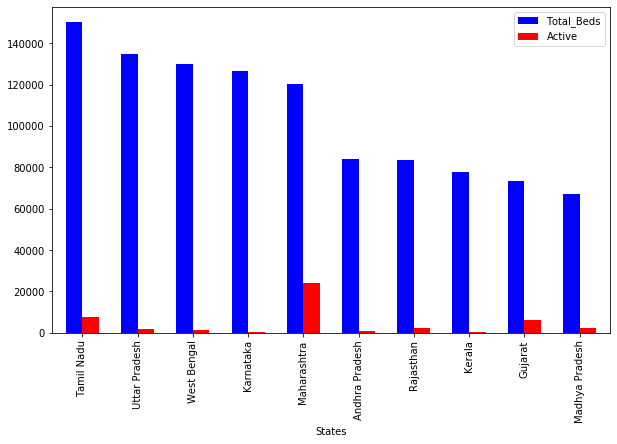

In [80]:
for state in states:
    beds_vs_active=india_state_cases.loc[india_state_cases['State']==state]
    active=india_state_cases.groupby(['State'])['Active'].max()
    beds=hospital_beds_active.groupby(['State/UT'])['Total_Beds'].max()
    beds_vs_active=pd.merge(active,beds,right_index=True,left_index=True)
beds_vs_active=beds_vs_active.reset_index()
bva=beds_vs_active[['Total_Beds','Active','index']].groupby('index').max().sort_values('Total_Beds',ascending=False).head(10)
bva.plot(kind='bar',width=0.6,colormap='bwr',figsize=(10,6))
plt.xlabel('States')
plt.show()

In [81]:
num_bed_mah=hospital_beds_active.loc[hospital_beds_active['State/UT']=='Maharashtra']['Total_Beds']
num_bed_mah=num_bed_mah.iloc[0]
num_mah=india_state_cases.loc[india_state_cases['State']=='Maharashtra'][['Date','Active']]
train_bed_mah=pd.DataFrame(columns=['ds','y'])
test_bed_mah=pd.DataFrame(columns=['ds','y'])
train_bed_mah_y= num_mah.iloc[:-5,-1:]
train_bed_mah_ds = num_mah.iloc[:-5,:1]
train_bed_mah=pd.merge(train_bed_mah_ds,train_bed_mah_y,right_index=True,left_index=True)
train_bed_mah.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)
test_bed_mah_y = num_mah.iloc[-3:,-1:]
test_bed_mah_ds = num_mah.iloc[-3:,:1]
test_bed_mah=pd.merge(test_bed_mah_ds,test_bed_mah_y,right_index=True,left_index=True)
test_bed_mah.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)

In [82]:
test_bed_mah = test_bed_mah.set_index("ds")
test_bed_mah = test_bed_mah['y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


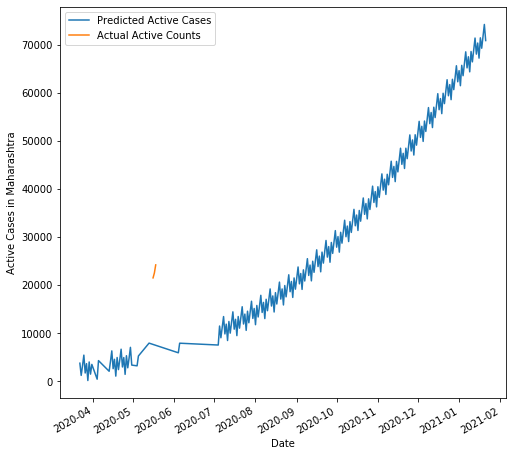

In [83]:
model_bed_mah = Prophet(growth = "logistic",changepoints=['2020-04-14','2020-04-21','2020-04-30','2020-05-13','2020-05-27','2020-06-30'])
bed_cap = num_bed_mah
train_bed_mah['cap'] = bed_cap
model_bed_mah.fit(train_bed_mah)
# Future Prediction
future_dates = model_bed_mah.make_future_dataframe(periods=200)
future_dates['cap'] = bed_cap
forecast_mah =  model_bed_mah.predict(future_dates)
# Plotting
ax = forecast_mah.plot(x='ds',y='yhat',label='Predicted Active Cases',legend=True,figsize=(8,8))
test_bed_mah.plot(y='y',label='Actual Active Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Active Cases in Maharashtra");

In [84]:
forecast_mah.iloc[80:100]

ds         trend     cap    yhat_lower    yhat_upper   trend_lower  \
80 2020-08-18  17685.875727  120444  13969.465395  22731.142829  17685.875595   
81 2020-08-19  17895.051033  120444  15742.900752  25226.298025  17895.050895   
82 2020-08-20  18106.264388  120444  12503.591239  21379.647013  18106.264240   
83 2020-08-21  18319.525330  120444  14609.078480  23667.325188  18319.525176   
84 2020-08-22  18534.843190  120444  11049.041914  20406.660470  18534.843034   
85 2020-08-23  18752.227084  120444  14875.947022  24647.710063  18752.226923   
86 2020-08-24  18971.685909  120444  12763.246897  22211.941429  18971.685742   
87 2020-08-25  19193.228330  120444  14959.046690  24716.231542  19193.228155   
88 2020-08-26  19416.862780  120444  17728.858817  26683.805364  19416.862597   
89 2020-08-27  19642.597450  120444  13918.117051  23191.598766  19642.597260   
90 2020-08-28  19870.440281  120444  15909.413866  25216.493139  19870.440086   
91 2020-08-29  20100.398959  120444  12849.081566  22152.256713  20100.398759   
92 2020-08-30  20332.480906  120444  17139.102913  26015.058641  20332.480700   
93 2020-08-31  20566.693274  120444  14277.741330  24080.381577  20566.693059   
94 2020-09-01  20803.042939  120444  16649.613519  25889.800806  20803.042713   
95 2020-09-02  21041.536492  120444  19025.966455  28299.536072  21041.536257   
96 2020-09-03  21282.180232  120444  15850.876902  24618.029067  21282.179989   
97 2020-09-04  21524.980158  120444  17620.356773  26918.575457  21524.979906   
98 2020-09-05  21769.941966  120444  14162.165187  23655.934053  21769.941707   
99 2020-09-06  22017.071037  120444  18663.850273  27701.552332  22017.070766   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
80  17685.875843      537.863506            537.863506            537.863506   
81  17895.051156     2694.607793           2694.607793           2694.607793   
82  18106.264518    -1055.911229          -1055.911229          -1055.911229   
83  18319.525468      847.598298            847.598298            847.598298   
84  18534.843333    -2699.835666          -2699.835666          -2699.835666   
85  18752.227233     1122.901837           1122.901837           1122.901837   
86  18971.686064    -1447.224539          -1447.224539          -1447.224539   
87  19193.228492      537.863506            537.863506            537.863506   
88  19416.862950     2694.607793           2694.607793           2694.607793   
89  19642.597626    -1055.911229          -1055.911229          -1055.911229   
90  19870.440463      847.598298            847.598298            847.598298   
91  20100.399148    -2699.835666          -2699.835666          -2699.835666   
92  20332.481103     1122.901837           1122.901837           1122.901837   
93  20566.693478    -1447.224539          -1447.224539          -1447.224539   
94  20803.043152      537.863506            537.863506            537.863506   
95  21041.536713     2694.607793           2694.607793           2694.607793   
96  21282.180463    -1055.911229          -1055.911229          -1055.911229   
97  21524.980397      847.598298            847.598298            847.598298   
98  21769.942212    -2699.835666          -2699.835666          -2699.835666   
99  22017.071290     1122.901837           1122.901837           1122.901837   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
80   537.863506    537.863506    537.863506                   0.0   
81  2694.607793   2694.607793   2694.607793                   0.0   
82 -1055.911229  -1055.911229  -1055.911229                   0.0   
83   847.598298    847.598298    847.598298                   0.0   
84 -2699.835666  -2699.835666  -2699.835666                   0.0   
85  1122.901837   1122.901837   1122.901837                   0.0   
86 -1447.224539  -1447.224539  -1447.224539                   0.0   
87   537.863506    537.863506    537.863506                   0.0   
88  269